In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

# I

**Train-test Split**

In [6]:
features = df.drop(['Rings'],axis=1)
target = df['Rings']

In [7]:
train_df, test_df = train_test_split(df,test_size=0.3, random_state=42)

In [8]:
train_df.to_csv("abalone_train.csv",index=False)
test_df.to_csv("abalone_test.csv",index=False)

# II

In [9]:
(train_df.corr(method='pearson')['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.625019
Diameter          0.566131
Length            0.549896
Height            0.543747
Whole weight      0.534815
Viscera weight    0.499167
Shucked weight    0.413910
Name: Rings, dtype: float64

In [10]:
hc_feat = (train_df.corr(method='pearson')['Rings'].sort_values(ascending=False)).index[1]
hc_feat

'Shell weight'

 *As we can see from above Series, the attribute **'Shell weight'** is having the highest pearson's correlation value with the target variable **'Rings'**.*

In [11]:
train_df_hc = pd.read_csv("abalone_train.csv")

In [12]:
X_train_hc = train_df[hc_feat].to_numpy().reshape((-1,1))
y_train_hc = train_df['Rings'].to_numpy().reshape((-1,1))

In [13]:
bias = np.ones(shape=(len(X_train_hc),1))
bias

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [14]:
X_train_hc = np.concatenate((bias,X_train_hc),axis=1)
X_train_hc

array([[1.    , 0.1815],
       [1.    , 0.105 ],
       [1.    , 0.145 ],
       ...,
       [1.    , 0.188 ],
       [1.    , 0.235 ],
       [1.    , 0.271 ]])

In [15]:
weigths_hc = inv(X_train_hc.T @ X_train_hc) @ X_train_hc.T @ y_train_hc
weigths_hc

array([[ 6.5089702 ],
       [14.40180027]])

In [16]:
y_train_pred = X_train_hc @ weigths_hc
y_train_pred

array([[ 9.12289695],
       [ 8.02115923],
       [ 8.59723124],
       ...,
       [ 9.21650866],
       [ 9.89339327],
       [10.41185808]])

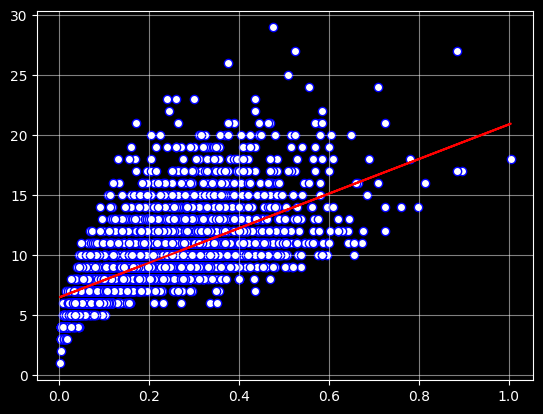

In [56]:
plt.style.use('dark_background')
plt.scatter(X_train_hc[:,1], y_train_hc, color='white', marker='o',edgecolors='blue')
plt.plot(X_train_hc[:,1], y_train_pred, color='r')
plt.grid(alpha=0.5) 
plt.show()

In [18]:
y_train_hc

array([[ 9],
       [ 7],
       [11],
       ...,
       [11],
       [ 9],
       [ 6]])

In [19]:
y_train_pred

array([[ 9.12289695],
       [ 8.02115923],
       [ 8.59723124],
       ...,
       [ 9.21650866],
       [ 9.89339327],
       [10.41185808]])

In [20]:
def RMSE_percentage(y_true, y_pred):
    mysum = 0
    for i,j in zip(y_true,y_pred):
        # print(mysum)
        mysum += (i-j)**2
    mysum /= len(y_true)
    mysum = mysum**0.5
    # mysum /= np.mean(y_true)
    return mysum

In [21]:
RMSE_percentage(y_train_hc, y_train_pred)

array([2.52784634])

In [22]:
X_train_hc

array([[1.    , 0.1815],
       [1.    , 0.105 ],
       [1.    , 0.145 ],
       ...,
       [1.    , 0.188 ],
       [1.    , 0.235 ],
       [1.    , 0.271 ]])

# II (b)

In [23]:
test_df_hc = pd.read_csv("abalone_test.csv")

In [24]:
X_test_hc = test_df['Shell weight'].to_numpy().reshape((-1,1))
y_test_hc = test_df['Rings'].to_numpy().reshape((-1,1))

In [25]:
X_test_hc

array([[0.325],
       [0.245],
       [0.335],
       ...,
       [0.18 ],
       [0.406],
       [0.115]])

In [26]:
test_bias = np.ones(shape=(len(X_test_hc),1))
test_bias

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [27]:
X_test_hc = np.concatenate((test_bias,X_test_hc),axis=1)
X_test_hc

array([[1.   , 0.325],
       [1.   , 0.245],
       [1.   , 0.335],
       ...,
       [1.   , 0.18 ],
       [1.   , 0.406],
       [1.   , 0.115]])

In [28]:
y_test_pred = X_test_hc @ weigths_hc
y_test_pred

array([[11.18955529],
       [10.03741127],
       [11.3335733 ],
       ...,
       [ 9.10129425],
       [12.35610111],
       [ 8.16517724]])

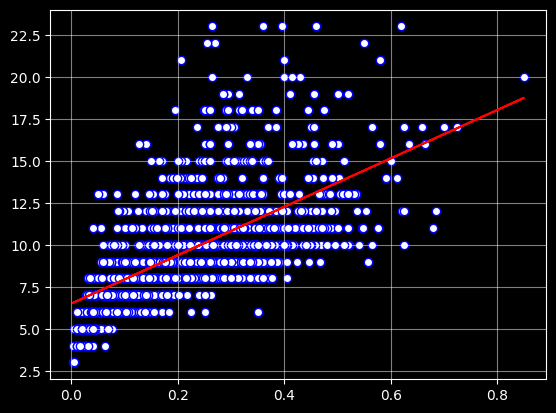

In [57]:
plt.style.use('dark_background')
plt.scatter(X_test_hc[:,1], y_test_hc, color='white', marker='o', edgecolors='blue')
plt.plot(X_test_hc[:,1], y_test_pred, color='r')
plt.grid(alpha=0.5) 
plt.show()

In [58]:
RMSE_percentage(y_test_hc, y_test_pred)

array([2.46794015])

# II (c)

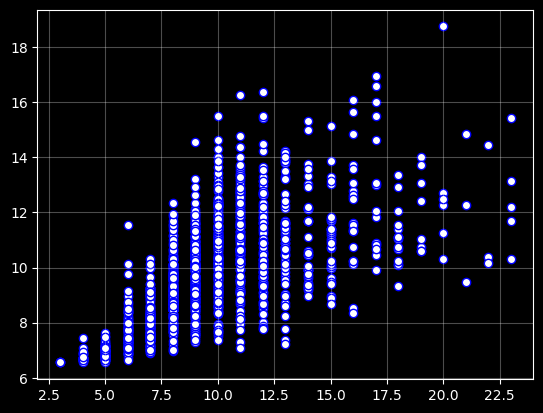

In [59]:
# plt.style.use('dark_background')
plt.scatter(y_test_hc, y_test_pred, color='white', marker='o',edgecolors='blue')
plt.grid(alpha=0.3)
plt.show()

# III

In [60]:
X_train_hc

array([[1.    , 0.1815],
       [1.    , 0.105 ],
       [1.    , 0.145 ],
       ...,
       [1.    , 0.188 ],
       [1.    , 0.235 ],
       [1.    , 0.271 ]])

In [61]:
def Poly_regres(p,for_pred, X=X_train_hc , y=y_train_hc):
    for i in range(2,p+1):
        new_col = X[:,1].reshape((-1,1))**i
        new_col_1 = for_pred[:,1].reshape((-1,1))**i
        # print(len(new_col), len(X))
        X = np.concatenate((X,new_col),axis=1)
        for_pred = np.concatenate((for_pred,new_col_1),axis=1)
    weigths = ((inv((X.T) @ X)) @ (X.T)) @ y
    ans = for_pred @ weigths
    return ans

In [62]:
X_train_hc[:,1].reshape((-1,1))**2

array([[0.03294225],
       [0.011025  ],
       [0.021025  ],
       ...,
       [0.035344  ],
       [0.055225  ],
       [0.073441  ]])

In [63]:
Poly_regres(3,X_train_hc)

array([[ 9.52252937],
       [ 7.9431585 ],
       [ 8.82800306],
       ...,
       [ 9.63589966],
       [10.37251748],
       [10.84933381]])

In [64]:
def plot_all(which, y_true):
    err_lst = []
    degree_lst = []
    for i in range(2,6):
        degree_lst.append(f'{i}')
        pred = Poly_regres(i,which)
        # print((RMSE_percentage(y_true,pred)))
        err_lst.append(float(RMSE_percentage(y_true,pred)[0]))
    # plt.style.use('dark_background')
    plt.bar(degree_lst,err_lst,color='white')
    plt.xlabel("Degrees")
    plt.ylabel("RMSE values")
    plt.title("Bar graph of RMSE values v/s degree of polynomial")
    plt.ylim(min(err_lst)-0.002,max(err_lst)+0.002)
    plt.show()

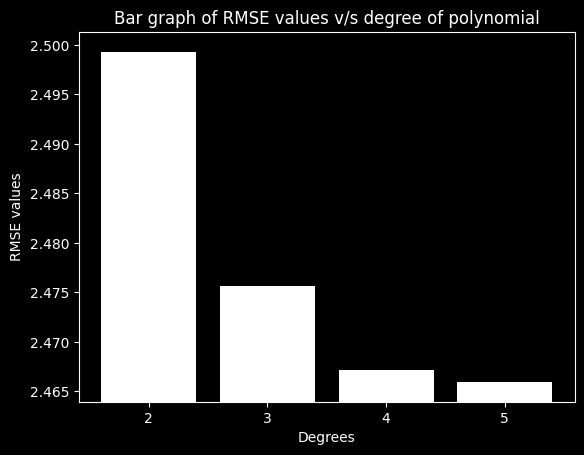

In [65]:
plot_all(X_train_hc,y_train_hc)

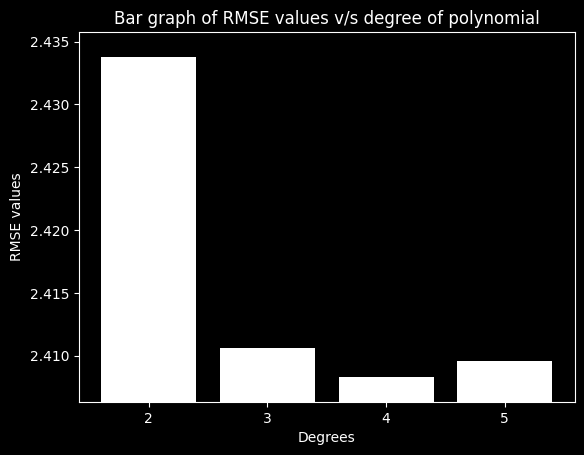

In [66]:
plot_all(X_test_hc,y_test_hc)

# III (c)

**As we can see, p = 4 corresponds to the best-fit model as the value of RMSE for test set is the lowest for p = 4.**

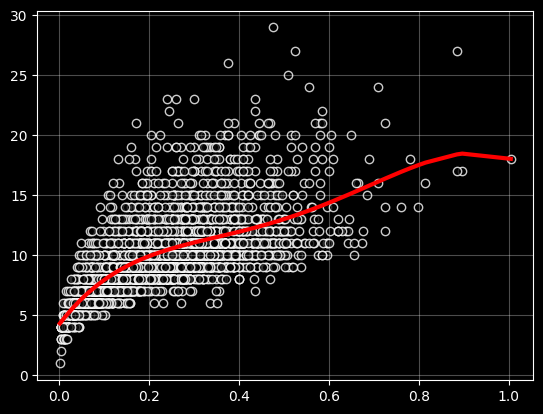

In [67]:
# plt.style.use('dark_background')
sorted_arr = X_train_hc[X_train_hc[:, 1].argsort()]
curve_pts = Poly_regres(4,sorted_arr)
plt.scatter(X_train_hc[:,1], y_train_hc,color='black',edgecolors='white',alpha=0.8)
plt.plot(sorted_arr[:,1], curve_pts, color='red',linewidth=3)
plt.grid(alpha=0.3)
plt.show()

In [68]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# **Auto-regression**

In [69]:
asian_df = pd.read_csv("asianpaint.csv",index_col=0)

In [70]:
asian_df

,Open
Date,
01-01-2020,1790.20
02-01-2020,1791.00
03-01-2020,1779.80
06-01-2020,1737.95
07-01-2020,1711.00
...,...
26-04-2021,2530.00
27-04-2021,2545.00
28-04-2021,2588.00


**Train-test Split**

In [71]:
asian_train = asian_df[:int(.65*len(asian_df))]
asian_test = asian_df[int(.65*len(asian_df)):]

**Plotting both datasets**

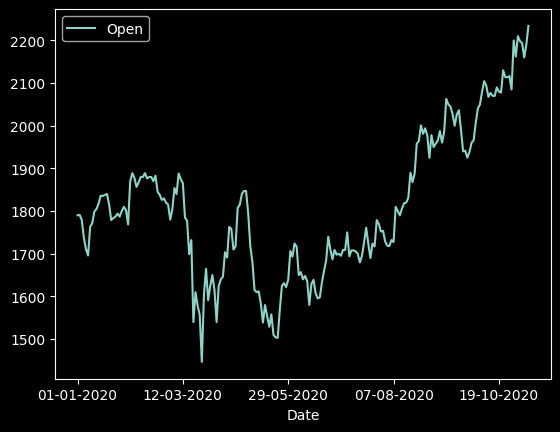

In [72]:
asian_train.plot()
plt.show()

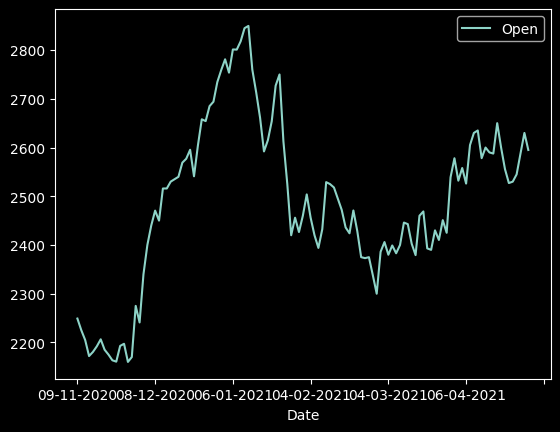

In [73]:
asian_test.plot()
plt.show()

**Implement auto-regression**

In [74]:
X_as = asian_train.to_numpy()[:-1]
biases = np.ones(shape=(len(X_as),1))
X_as = np.concatenate((biases,X_as),axis=1)

In [75]:
y_as = asian_train.to_numpy()[1:]

In [76]:
weights = inv(X_as.T @ X_as) @ X_as.T @ y_as

In [77]:
weights

array([[22.7027736 ],
       [ 0.98858479]])

In [78]:
asian_train.index

Index(['01-01-2020', '02-01-2020', '03-01-2020', '06-01-2020', '07-01-2020',
       '08-01-2020', '09-01-2020', '10-01-2020', '13-01-2020', '14-01-2020',
       ...
       '26-10-2020', '27-10-2020', '28-10-2020', '29-10-2020', '30-10-2020',
       '02-11-2020', '03-11-2020', '04-11-2020', '05-11-2020', '06-11-2020'],
      dtype='object', name='Date', length=215)

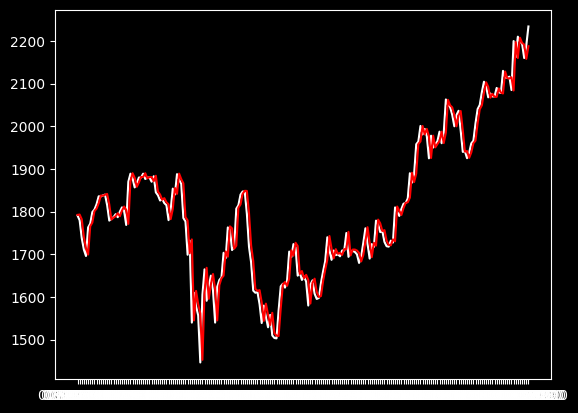

In [83]:
plt.plot(asian_train.index[:-1],asian_train[1:],color='white',alpha=1)
plt.plot(asian_train.index[:-1],X_as @ weights,color='red',alpha=1)
plt.show()

In [80]:
X_test_as = asian_test.to_numpy()[:-1]
biases = np.ones(shape=(len(X_test_as),1))
X_test_as = np.concatenate((biases,X_test_as),axis=1)

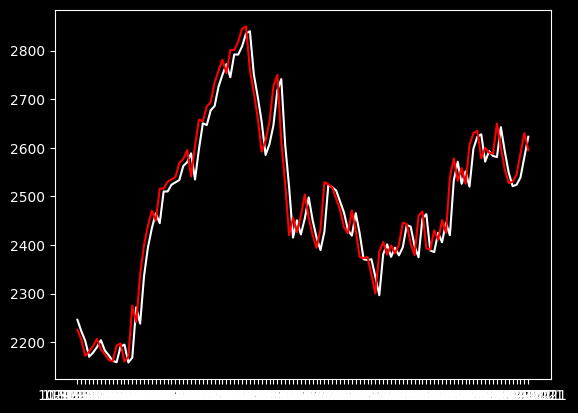

In [103]:
plt.plot(asian_test.index[1:], X_test_as@weights, color='white')
plt.plot(asian_test.index[1:], asian_test[1:], color='red')
plt.show()

**Calculating RMSE & MAPE**

In [104]:
def RMSE_percent(y_true, y_pred):
    mysum = 0
    for i,j in zip(y_true,y_pred):
        # print(mysum)
        mysum += (i-j)**2
    mysum /= len(y_true)
    mysum = mysum**0.5
    return mysum

In [108]:
(np.mean((asian_test[1:].to_numpy() - X_test_as@weights)**2))**0.5

44.73171804008782

In [105]:
def MAPE_percent(y_true, y_pred):
    mysum = 0
    for i,j in zip(y_true,y_pred):
        mysum += (abs(i-j) / i)
    mysum /= len(y_true)
    return mysum*100

In [106]:
RMSE_percent(asian_test[1:].to_numpy(), X_test_as@weights)

array([44.73171804])

In [107]:
MAPE_percent(asian_test[1:].to_numpy(), X_test_as@weights)

array([1.42414534])